In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




In [2]:
# Importing all datasets
import os
print(os.getcwd())
churn_data = pd.read_csv("/Users/manoj/work/iiit-upgrad/Machine-Learning-Case-Study/Telcome_Churn/data/telecom_churn_data.csv")
churn_data.head()

/Users/manoj/work/iiit-upgrad/Machine-Learning-Case-Study/Telcome_Churn


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Too many rows to Analyze.
##### Check Missing data and remove who have too many missing values in column

In [5]:
missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]
missing_column_data=churn_data[missing_column]
missing_column_data.isnull().sum()

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
arpu_3g_6                   74846
arpu_3g_7                   74428
arpu_3g_8                   73660
arpu_3g_9                   74077
arpu_2g_6                   74846
arpu_2g_7     

#### As too many column data are missing more than 50%, lets check if column value if missing more than 5%

In [6]:
#missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 5]
#missing_column
#print((100*churn_data.isnull().sum()/len(churn_data.index)))
print(churn_data.filter(regex='rech').columns)
print("Missing Columns Name of more than 50% value missing=====")
print(churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50])
missing_columns = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')
Missing Columns Name of more than 50% value

#### Lots of column having more than 50% data is mssing.

In [23]:
### Removing column if all rows value is missings
cleaned_churn_df = churn_data.drop(labels=missing_columns,axis=1)
cleaned_churn_df.shape

(99999, 186)

#### Impute with mean rows which having any missing values,

In [24]:
cleaned_churn_df = cleaned_churn_df.fillna(cleaned_churn_df.mean())
cleaned_churn_df.shape

(99999, 186)

In [25]:
cleaned_churn_df.select_dtypes(exclude=['int', 'float']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [26]:
date_attributes = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9']
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [27]:
cleaned_churn_df[date_attributes] = cleaned_churn_df[date_attributes].applymap(lambda x : pd.to_datetime(x, infer_datetime_format=True))

In [28]:
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28


In [29]:
cleaned_churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,291.298012,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,8.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,37.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,132.395875,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [30]:
# Remove Missing rows row
cleaned_churn_df = cleaned_churn_df.dropna(axis=0,how='any')
cleaned_churn_df.shape

(91319, 186)

In [31]:
cleaned_churn_df.select_dtypes(exclude=['int', 'float']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

## Data Preparation

In [32]:
## Number of days between two recharcge:
cleaned_churn_df['first_recharge_gap'] = cleaned_churn_df['date_of_last_rech_7'] - cleaned_churn_df['date_of_last_rech_6']
cleaned_churn_df['second_recharge_gap'] = cleaned_churn_df['date_of_last_rech_8'] - cleaned_churn_df['date_of_last_rech_7']
cleaned_churn_df['third_recharge_gap'] = cleaned_churn_df['date_of_last_rech_9'] - cleaned_churn_df['date_of_last_rech_8']

##### Remove date columns from data sets as of no use.

In [33]:
derived_df = cleaned_churn_df.drop(labels=date_attributes,axis=1)
derived_df['first_recharge_gap']= derived_df['first_recharge_gap']/np.timedelta64(1,'D')
derived_df['second_recharge_gap']= derived_df['second_recharge_gap']/np.timedelta64(1,'D')
derived_df['third_recharge_gap']= derived_df['third_recharge_gap']/np.timedelta64(1,'D')


derived_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,...,0,0,968,30.4,0.0,101.20,3.58,25.0,23.0,51.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,...,0,0,1006,0.0,0.0,0.00,0.00,32.0,28.0,33.0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,...,0,0,1103,0.0,0.0,4.17,0.00,37.0,21.0,46.0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,...,0,0,2491,0.0,0.0,0.00,0.00,33.0,31.0,30.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,...,0,0,1526,0.0,0.0,0.00,0.00,32.0,12.0,50.0


In [34]:
#cleaned_df['avg_recharge_goodPhase'] = 
recharge_attributes_df = derived_df.filter(regex='rech')
recharge_attributes_df.head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,first_recharge_gap,second_recharge_gap,third_recharge_gap
0,4,3,2,6,362,252,252,0,252,252,252,0,25.0,23.0,51.0
1,4,9,11,5,74,384,283,121,44,154,65,50,32.0,28.0,33.0
2,5,4,2,7,168,315,116,358,86,200,86,100,37.0,21.0,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,33.0,31.0,30.0
4,5,6,3,4,196,350,287,200,56,110,110,50,32.0,12.0,50.0


In [35]:
recharge_attributes_df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'first_recharge_gap', 'second_recharge_gap', 'third_recharge_gap'],
      dtype='object')

#### Considering Total recharge amount  total_rech_amt_* to derived high end customer


In [36]:
#derived_df.filter(regex='rech').columns

In [37]:
## Average of Good Phase will be avg of 6th and 7th Month amount
derived_df['av_amt_rech_good_phase'] = (derived_df['total_rech_amt_6'] + derived_df['total_rech_amt_7'])/2
derived_df['av_amt_rech_good_phase'].describe()

count    91319.000000
mean       336.553707
std        377.419344
min          0.000000
25%        123.000000
50%        240.000000
75%        433.500000
max      37762.500000
Name: av_amt_rech_good_phase, dtype: float64

In [38]:
# Calculating 70% percentile vale
X= derived_df.av_amt_rech_good_phase.quantile(0.7)

In [39]:
high_usage_customer = derived_df.loc[derived_df['av_amt_rech_good_phase'] >= X]
high_usage_customer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,802,57.74,19.38,18.74,0.0,28.0,32.0,35.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,2607,0.00,0.00,0.00,0.0,32.0,39.0,27.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0


In [40]:
high_usage_customer.shape

(27494, 182)

#### Now need to derive all 9th month data and customer usage data to tag Churn or not Churn

In [41]:
churn_phase_attributes = high_usage_customer.filter(regex='_9').columns
churn_phase_attributes

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [42]:
#total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
churn_phase_decision_making_attributes= ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
high_usage_customer['churn']=high_usage_customer[churn_phase_decision_making_attributes].sum(axis=1)
high_usage_customer['churn'] = high_usage_customer['churn'] > 0
high_usage_customer['churn'] = high_usage_customer['churn'].map({True:0,False:1})

#### Droping Churn phase atributes

In [43]:
action_phase_df = high_usage_customer.drop(labels=churn_phase_attributes,axis=1)
action_phase_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,802,57.74,19.38,18.74,0.0,28.0,32.0,35.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,2607,0.00,0.00,0.00,0.0,32.0,39.0,27.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0,0


In [44]:
### Remove missing row from dataframe
action_phase_df = action_phase_df.dropna(axis=0,how='any')

In [45]:
action_phase_df.shape

(27494, 141)

#### Combine all Good phase attributes as one attributes

In [46]:
good_phase_attributes6  = action_phase_df.filter(regex='_6').columns
good_phase_attributes7 = action_phase_df.filter(regex='_7').columns

print(good_phase_attributes6)
print(good_phase_attributes7)

action_phase_df['arpu_'] = (action_phase_df['arpu_6'] + action_phase_df['arpu_7'])/2
#action_phase_df['onmet_mou_'] = (action_phase_df['onmet_mou_6'] + action_phase_df['onmet_mou_7'])/2
action_phase_df['offnet_mou_'] = (action_phase_df['offnet_mou_6'] + action_phase_df['offnet_mou_7'])/2
action_phase_df['roam_ic_mou_'] = (action_phase_df['roam_ic_mou_6'] + action_phase_df['roam_ic_mou_7'])/2
action_phase_df['roam_og_mou_'] = (action_phase_df['roam_og_mou_6'] + action_phase_df['roam_og_mou_7'])/2
action_phase_df['loc_og_t2t_mou_'] = (action_phase_df['loc_og_t2t_mou_6'] + action_phase_df['loc_og_t2t_mou_7'])/2
action_phase_df['loc_og_t2c_mou_'] = (action_phase_df['loc_og_t2c_mou_6'] + action_phase_df['loc_og_t2c_mou_7'])/2
action_phase_df['loc_og_mou_'] = (action_phase_df['loc_og_mou_6'] + action_phase_df['loc_og_mou_7'])/2
action_phase_df['std_og_t2t_mou_'] = (action_phase_df['std_og_t2t_mou_6'] + action_phase_df['std_og_t2t_mou_7'])/2
action_phase_df['std_og_t2m_mou_'] = (action_phase_df['std_og_t2m_mou_6'] + action_phase_df['std_og_t2m_mou_7'])/2
action_phase_df['std_og_t2f_mou_'] = (action_phase_df['std_og_t2f_mou_6'] + action_phase_df['std_og_t2f_mou_7'])/2
action_phase_df['std_og_t2c_mou_'] = (action_phase_df['std_og_t2c_mou_6'] + action_phase_df['std_og_t2c_mou_7'])/2
action_phase_df['std_og_mou_'] = (action_phase_df['std_og_mou_6'] + action_phase_df['std_og_mou_7'])/2
action_phase_df['isd_og_mou_'] = (action_phase_df['isd_og_mou_6'] + action_phase_df['isd_og_mou_7'])/2
action_phase_df['spl_og_mou_'] = (action_phase_df['spl_og_mou_6'] + action_phase_df['spl_og_mou_7'])/2
action_phase_df['og_others_'] = (action_phase_df['og_others_6'] + action_phase_df['og_others_7'])/2
action_phase_df['total_og_mou_'] = (action_phase_df['total_og_mou_6'] + action_phase_df['total_og_mou_7'])/2
action_phase_df['loc_ic_t2t_mou_'] = (action_phase_df['loc_ic_t2t_mou_6'] + action_phase_df['loc_ic_t2t_mou_7'])/2
action_phase_df['loc_ic_t2m_mou_'] = (action_phase_df['loc_ic_t2m_mou_6'] + action_phase_df['loc_ic_t2m_mou_7'])/2
action_phase_df['loc_ic_t2f_mou_'] = (action_phase_df['loc_ic_t2f_mou_6'] + action_phase_df['loc_ic_t2f_mou_7'])/2
action_phase_df['loc_ic_mou_'] = (action_phase_df['loc_ic_mou_6'] + action_phase_df['loc_ic_mou_7'])/2


action_phase_df['std_ic_t2t_mou_'] = (action_phase_df['std_ic_t2t_mou_6'] + action_phase_df['std_ic_t2t_mou_7'])/2
action_phase_df['std_ic_t2m_mou_'] = (action_phase_df['std_ic_t2m_mou_6'] + action_phase_df['std_ic_t2m_mou_7'])/2
action_phase_df['std_ic_t2f_mou_'] = (action_phase_df['std_ic_t2f_mou_6'] + action_phase_df['std_ic_t2f_mou_7'])/2
action_phase_df['std_ic_t2o_mou_'] = (action_phase_df['std_ic_t2o_mou_6'] + action_phase_df['std_ic_t2o_mou_7'])/2
action_phase_df['std_ic_mou_'] = (action_phase_df['std_ic_mou_6'] + action_phase_df['std_ic_mou_7'])/2
action_phase_df['total_ic_mou_'] = (action_phase_df['total_ic_mou_6'] + action_phase_df['total_ic_mou_7'])/2
action_phase_df['spl_ic_mou_'] = (action_phase_df['spl_ic_mou_6'] + action_phase_df['spl_ic_mou_7'])/2


action_phase_df['isd_ic_mou_'] = (action_phase_df['isd_ic_mou_6'] + action_phase_df['isd_ic_mou_7'])/2
action_phase_df['ic_others_'] = (action_phase_df['ic_others_6'] + action_phase_df['ic_others_7'])/2
action_phase_df['total_rech_num_'] = (action_phase_df['total_rech_num_6'] + action_phase_df['total_rech_num_7'])/2
action_phase_df['total_rech_amt_'] = (action_phase_df['total_rech_amt_6'] + action_phase_df['total_rech_amt_7'])/2
action_phase_df['max_rech_amt_'] = (action_phase_df['max_rech_amt_6'] + action_phase_df['max_rech_amt_7'])/2
action_phase_df['last_day_rch_amt_'] = (action_phase_df['last_day_rch_amt_6'] + action_phase_df['last_day_rch_amt_7'])/2
action_phase_df['vol_2g_mb_'] = (action_phase_df['vol_2g_mb_6'] + action_phase_df['vol_2g_mb_7'])/2

action_phase_df['vol_3g_mb_'] = (action_phase_df['vol_3g_mb_6'] + action_phase_df['vol_3g_mb_7'])/2
action_phase_df['monthly_2g_'] = (action_phase_df['monthly_2g_6'] + action_phase_df['monthly_2g_7'])/2
action_phase_df['sachet_2g_'] = (action_phase_df['sachet_2g_6'] + action_phase_df['sachet_2g_7'])/2
action_phase_df['monthly_3g_'] = (action_phase_df['monthly_3g_6'] + action_phase_df['monthly_3g_7'])/2
action_phase_df['sachet_3g_'] = (action_phase_df['sachet_3g_6'] + action_phase_df['sachet_3g_7'])/2



good_action_df = action_phase_df.drop(columns=good_phase_attributes6,axis=1)
good_action_df = good_action_df.drop(columns=good_phase_attributes7,axis=1)

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6'],
      dtype='object')
Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_

In [47]:
good_action_df.shape

(27494, 96)

In [48]:
local_usage = good_action_df.filter(regex='loc').columns
#local_usage
good_action_df['loc_incoming'] = (good_action_df['loc_ic_t2o_mou']+good_action_df['loc_ic_t2t_mou_']+good_action_df['loc_ic_t2m_mou_']+good_action_df['loc_ic_t2f_mou_']+good_action_df['loc_ic_mou_'])/5
good_action_df['loc_outgoing'] = (good_action_df['loc_og_t2o_mou']+good_action_df['loc_og_t2t_mou_']+good_action_df['loc_og_t2c_mou_']+good_action_df['loc_og_mou_'])/4

good_action_df['loc_outgoing_8'] = (good_action_df['loc_og_t2t_mou_8'] + good_action_df['loc_og_t2m_mou_8']+good_action_df['loc_og_t2f_mou_8']+good_action_df['loc_og_t2c_mou_8']+good_action_df['loc_og_mou_8'])/5
good_action_df['loc_incoming_8'] = (good_action_df['loc_ic_t2t_mou_8']+good_action_df['loc_ic_t2m_mou_8']+good_action_df['loc_ic_t2f_mou_8']+good_action_df['loc_ic_mou_8'])/4
    
good_action_df=good_action_df.drop(columns=local_usage,axis=1)

In [49]:
std_usage = good_action_df.filter(regex='std').columns
#std_usage
good_action_df['std_og'] = (good_action_df['std_og_t2o_mou']+good_action_df['std_og_t2t_mou_']+good_action_df['std_og_t2c_mou_']+good_action_df['std_og_mou_'])/4
good_action_df['std_ic'] = (good_action_df['std_ic_t2o_mou_']+good_action_df['std_ic_t2t_mou_']+good_action_df['std_ic_t2m_mou_']+good_action_df['std_ic_t2f_mou_']+good_action_df['std_ic_mou_'])/5



good_action_df['std_og_8'] = (good_action_df['std_og_t2t_mou_8'] + good_action_df['std_og_t2m_mou_8']+good_action_df['std_og_t2f_mou_8']+good_action_df['std_og_t2c_mou_8']+good_action_df['std_og_mou_8'])/5
good_action_df['std_ic_8'] = (good_action_df['std_ic_t2t_mou_8']+good_action_df['std_ic_t2m_mou_8']+good_action_df['std_ic_t2f_mou_8']+good_action_df['std_ic_mou_8'])/4
    
good_action_df=good_action_df.drop(columns=std_usage,axis=1)


good_action_df.shape

(27494, 65)

## Model Building

In [68]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = good_action_df.drop(['churn','mobile_number','circle_id'],axis=1)

# Putting response variable to y
y = action_phase_df['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [70]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled.shape

(19245, 62)

In [72]:
### Check Balance of Churn rate data
sum(y)/len(y)*100

6.550520113479305

In [75]:
def modelEvaluationMatrix(y_train,y_test,train_pred,predictions):
    cm = confusion_matrix(y_test, predictions)
    print("Train Accuracy :: ", accuracy_score(y_train, train_pred))
    print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
    print(" Confusion matrix ", cm)
    print("Confusion Report ::", classification_report(y_test,predictions))
    plot_confusion_matrix(cm, classes=['Non Churn', 'Churn'], title='Confusion matrix')
    draw_roc(y_test, predictions)

In [63]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [64]:
# calculate AUC
def plotAUC(y_test,pred_probs_test):
    auc = roc_auc_score(y_test, pred_probs_test)
    print('AUC: %.3f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    roc_auc = metrics.auc(fpr,tpr)
    print("Roc and auc score:", roc_auc)
    # Plot ROC
    plt.figure(figsize=(6,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#draw_roc(y_test, pred_probs_test)

In [73]:
### AS Data is Inbalance, Using SMOTE technique oversmapling method

In [74]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1263
Before OverSampling, counts of label '0': 17982 

After OverSampling, the shape of train_X: (35964, 62)
After OverSampling, the shape of train_y: (35964,) 

After OverSampling, counts of label '1': 17982
After OverSampling, counts of label '0': 17982


Train Accuracy ::  0.8411015848272279
Test Accuracy  ::  0.8369499333252516
 Confusion matrix  [[6452 1259]
 [  86  452]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.99      0.84      0.91      7711
           1       0.26      0.84      0.40       538

   micro avg       0.84      0.84      0.84      8249
   macro avg       0.63      0.84      0.65      8249
weighted avg       0.94      0.84      0.87      8249

Confusion matrix, without normalization
[[6452 1259]
 [  86  452]]
Roc and auc score: 0.838437726436284


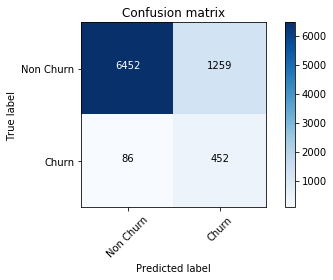

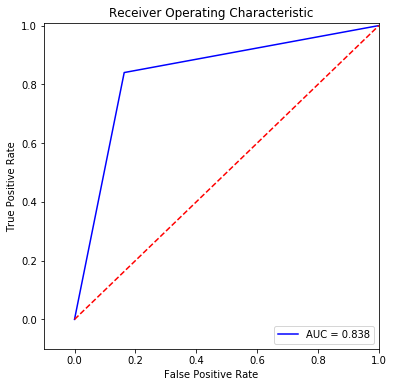

In [80]:
#### RFE with Logistic Regression to select Important Features only
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=40)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train_res,y_train_res)
train_pred = rfe.predict(X_train_scaled)
predictions = rfe.predict(X_test_scaled)
modelEvaluationMatrix(y_train,y_test,train_pred,predictions)

In [81]:
print("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns))

Features sorted by their rank:


[(1, 'aon'),
 (1, 'arpu_'),
 (1, 'arpu_8'),
 (1, 'aug_vbc_3g'),
 (1, 'av_amt_rech_good_phase'),
 (1, 'first_recharge_gap'),
 (1, 'ic_others_'),
 (1, 'isd_ic_mou_'),
 (1, 'isd_ic_mou_8'),
 (1, 'isd_og_mou_8'),
 (1, 'jul_vbc_3g'),
 (1, 'last_day_rch_amt_8'),
 (1, 'loc_incoming'),
 (1, 'loc_incoming_8'),
 (1, 'loc_outgoing_8'),
 (1, 'max_rech_amt_8'),
 (1, 'monthly_2g_'),
 (1, 'monthly_2g_8'),
 (1, 'monthly_3g_'),
 (1, 'monthly_3g_8'),
 (1, 'offnet_mou_'),
 (1, 'offnet_mou_8'),
 (1, 'onnet_mou_8'),
 (1, 'roam_ic_mou_'),
 (1, 'sachet_2g_8'),
 (1, 'second_recharge_gap'),
 (1, 'sep_vbc_3g'),
 (1, 'spl_ic_mou_8'),
 (1, 'std_ic'),
 (1, 'std_ic_8'),
 (1, 'std_og'),
 (1, 'std_og_8'),
 (1, 'third_recharge_gap'),
 (1, 'total_ic_mou_'),
 (1, 'total_ic_mou_8'),
 (1, 'total_og_mou_'),
 (1, 'total_og_mou_8'),
 (1, 'total_rech_amt_'),
 (1, 'total_rech_amt_8'),
 (1, 'vol_2g_mb_8'),
 (2, 'vol_3g_mb_8'),
 (3, 'max_rech_amt_'),
 (4, 'last_day_rch_amt_'),
 (5, 'total_rech_num_8'),
 (6, 'spl_og_mou_8'),
 (7,

In [82]:

#help(RandomForestClassifier)

Train Accuracy ::  1.0
Test Accuracy  ::  0.940477633652564
 Confusion matrix  [[7386  325]
 [ 166  372]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7711
           1       0.53      0.69      0.60       538

   micro avg       0.94      0.94      0.94      8249
   macro avg       0.76      0.82      0.79      8249
weighted avg       0.95      0.94      0.94      8249

Confusion matrix, without normalization
[[7386  325]
 [ 166  372]]
Roc and auc score: 0.8246511163745704


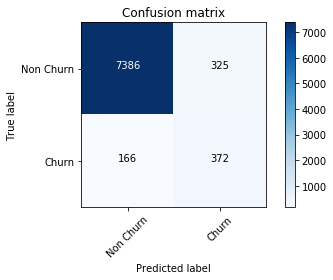

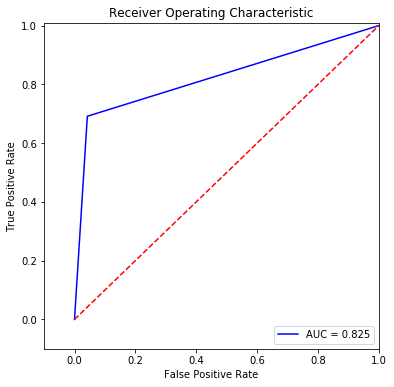

In [86]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100,random_state=432)
# Train the model on training data
rf.fit(X_train_res, y_train_res);
train_pred = rf.predict(X_train_scaled)
predictions = rf.predict(X_test_scaled)
modelEvaluationMatrix(y_train,y_test,train_pred,predictions)

In [87]:
### Important Features
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances[0:20]

,importance
roam_ic_mou_8,0.144953
roam_og_mou_8,0.136558
total_ic_mou_8,0.067470
total_rech_amt_8,0.042326
total_og_mou_8,0.040219
last_day_rch_amt_8,0.039967
loc_incoming_8,0.039271
arpu_8,0.038559
loc_outgoing_8,0.033064
second_recharge_gap,0.023650


Train Accuracy ::  0.9142197753308865
Test Accuracy  ::  0.8913807734270821
 Confusion matrix  [[6919  792]
 [ 104  434]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.99      0.90      0.94      7711
           1       0.35      0.81      0.49       538

   micro avg       0.89      0.89      0.89      8249
   macro avg       0.67      0.85      0.72      8249
weighted avg       0.94      0.89      0.91      8249

Confusion matrix, without normalization
[[6919  792]
 [ 104  434]]
Roc and auc score: 0.8519905180597023


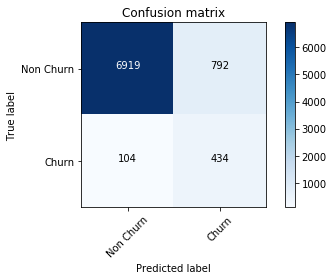

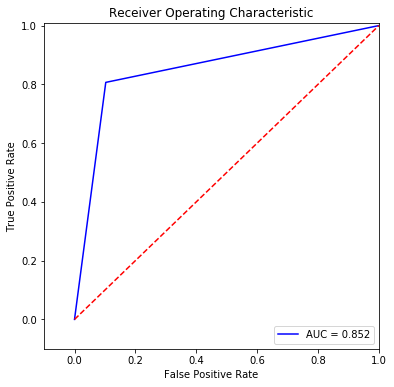

In [88]:
svclassifier = svm.SVC(kernel='rbf',C=1,gamma=0.01)  
svclassifier.fit(X_train_res, y_train_res) 
y_pred = svclassifier.predict(X_test_scaled) 
train_pred = svclassifier.predict(X_train_res)  
modelEvaluationMatrix(y_train_res,y_test,train_pred,y_pred)

Train Accuracy ::  0.9534812590368146
Test Accuracy  ::  0.927506364407807
 Confusion matrix  [[7245  466]
 [ 132  406]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.98      0.94      0.96      7711
           1       0.47      0.75      0.58       538

   micro avg       0.93      0.93      0.93      8249
   macro avg       0.72      0.85      0.77      8249
weighted avg       0.95      0.93      0.94      8249

Confusion matrix, without normalization
[[7245  466]
 [ 132  406]]
Roc and auc score: 0.8471068463485032


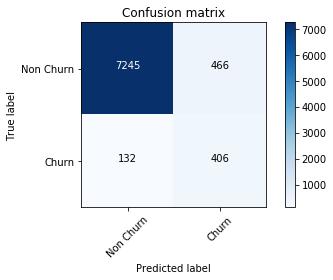

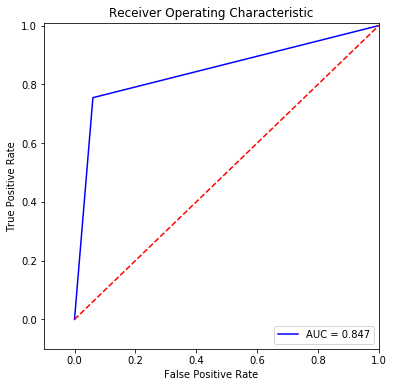

In [89]:
### XGBoost classification

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_res, y_train_res)
# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]
train_pred = model.predict(X_train_res)
predictions_train = [round(value) for value in train_pred]
#predictions = rf.predict(X_test_scaled)
modelEvaluationMatrix(y_train_res,y_test,train_pred,predictions)

#### PCA Implementation

In [90]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

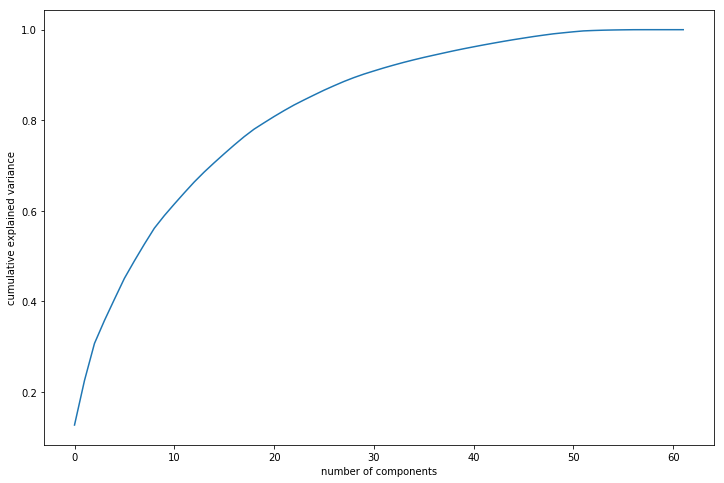

In [91]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [92]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12685026, 0.22523122, 0.30703795, 0.3576943 , 0.40464147,
       0.45082654, 0.48937567, 0.52632936, 0.56156023, 0.58936368,
       0.6148625 , 0.63963775, 0.66368191, 0.68570669, 0.70617241,
       0.72597309, 0.7452413 , 0.76367451, 0.78041537, 0.79445624,
       0.80821698, 0.82127299, 0.8336634 , 0.84485968, 0.8556862 ,
       0.86631151, 0.87615842, 0.88562985, 0.89421444, 0.90192749,
       0.9088559 , 0.91560322, 0.92187788, 0.92787399, 0.93345118,
       0.93874483, 0.94368925, 0.94855539, 0.95336832, 0.95790604,
       0.96219692, 0.96639375, 0.97038182, 0.97427874, 0.97798272,
       0.98145608, 0.98486963, 0.98796145, 0.99089827, 0.99318733,
       0.99537549, 0.99730597, 0.99822503, 0.9989057 , 0.99935947,
       0.99968563, 0.99994717, 0.999993  , 0.99999775, 0.99999992,
       1.        , 1.        ])

In [94]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(35964, 30)

In [95]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(8249, 30)

#### Applying a logistic regression on our Principal Components


Train Accuracy ::  0.8329162495829162
Test Accuracy  ::  0.813674384773912
 Confusion matrix  [[6261 1450]
 [  87  451]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.99      0.81      0.89      7711
           1       0.24      0.84      0.37       538

   micro avg       0.81      0.81      0.81      8249
   macro avg       0.61      0.83      0.63      8249
weighted avg       0.94      0.81      0.86      8249

Confusion matrix, without normalization
[[6261 1450]
 [  87  451]]
Roc and auc score: 0.8251234537249205


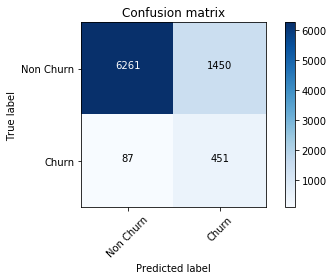

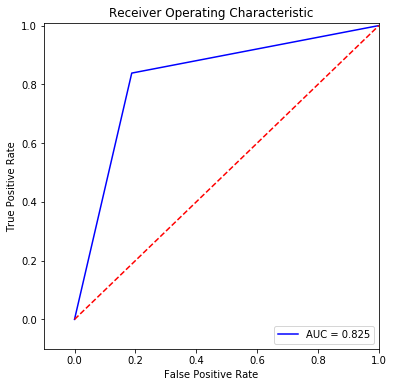

Train Accuracy ::  1.0
Test Accuracy  ::  0.9207176627469996
 Confusion matrix  [[7295  416]
 [ 238  300]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7711
           1       0.42      0.56      0.48       538

   micro avg       0.92      0.92      0.92      8249
   macro avg       0.69      0.75      0.72      8249
weighted avg       0.93      0.92      0.93      8249

Confusion matrix, without normalization
[[7295  416]
 [ 238  300]]
Roc and auc score: 0.751835956840491


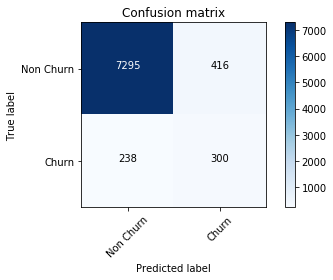

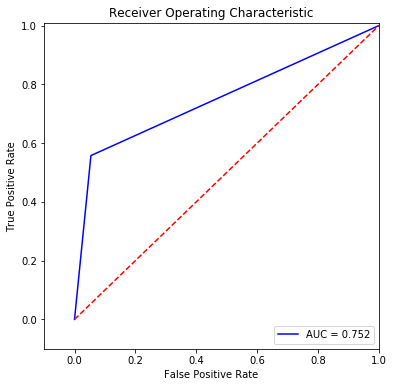

In [97]:
#Training the model on the train data

logistic_pca = LogisticRegression()
model_logpca = logistic_pca.fit(df_train_pca,y_train_res)

#Making prediction on the test data
pred_probs_test = model_logpca.predict(df_test_pca)
pred_probs_train = model_logpca.predict(df_train_pca)


modelEvaluationMatrix(y_train_res,y_test,pred_probs_train, pred_probs_test)

#Training the model on the train data

learner_pca = RandomForestClassifier(n_estimators=100,random_state=42)
model_pca = learner_pca.fit(df_train_pca,y_train_res)

#Making prediction on the test data
pred_probs_test = model_pca.predict(df_test_pca)
pred_probs_train = model_pca.predict(df_train_pca)


modelEvaluationMatrix(y_train_res,y_test,pred_probs_train, pred_probs_test)


In [98]:
pipe_svm = Pipeline([('pca', PCA()),
			('clf', svm.SVC(random_state=42))])

# Set grid search params
grid_params = [{'pca__n_components': [30, 40, 60],
    'clf__gamma': [1e-2, 1e-3, 1e-4],
    'clf__C': [1, 10, 100, 1000]}]

 # creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

gs = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params,
			scoring='accuracy',
			cv=folds)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Best accuracy: 0.935

Best params:
 {'clf__C': 10, 'clf__gamma': 0.0001, 'pca__n_components': 40}


In [99]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [100]:
gs.best_params_

{'clf__C': 10, 'clf__gamma': 0.0001, 'pca__n_components': 40}

Train Accuracy ::  0.8439550661772884
Test Accuracy  ::  0.8354952115407929
 Confusion matrix  [[6446 1265]
 [  92  446]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.99      0.84      0.90      7711
           1       0.26      0.83      0.40       538

   micro avg       0.84      0.84      0.84      8249
   macro avg       0.62      0.83      0.65      8249
weighted avg       0.94      0.84      0.87      8249

Confusion matrix, without normalization
[[6446 1265]
 [  92  446]]
Roc and auc score: 0.8324724636605169


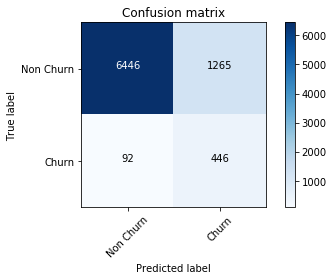

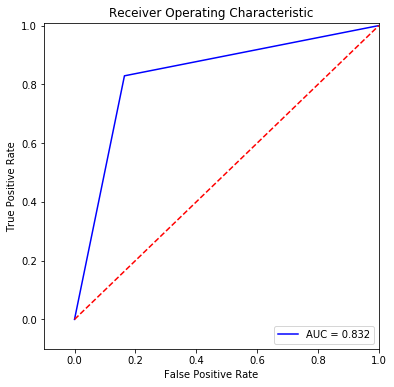

In [101]:
#Model with best params
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train_res)
df_test_pca = pca_final.transform(X_test_scaled)


svclassifier = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)  
svclassifier.fit(df_train_pca, y_train_res) 
y_pred = svclassifier.predict(df_test_pca) 
train_pred = svclassifier.predict(df_train_pca)  
modelEvaluationMatrix(y_train_res,y_test,train_pred,y_pred)


In [ ]:
svclassifier.